## Backpropagation Algorithm
The Backpropagation algorithm is a supervised learning method for multilayer feed-forward networks from the field of Artificial Neural Networks.

Feed-forward neural networks are inspired by the information processing of one or more neural cells, called a neuron. A neuron accepts input signals via its dendrites, which pass the electrical signal down to the cell body. The axon carries the signal out to synapses, which are the connections of a cell’s axon to other cell’s dendrites.

The principle of the backpropagation approach is to model a given function by modifying internal weightings of input signals to produce an expected output signal. The system is trained using a supervised learning method, where the error between the system’s output and a known expected output is presented to the system and used to modify its internal state.

Technically, the backpropagation algorithm is a method for training the weights in a multilayer feed-forward neural network. As such, it requires a network structure to be defined of one or more layers where one layer is fully connected to the next layer. A standard network structure is one input layer, one hidden layer, and one output layer.

Backpropagation can be used for both classification and regression problems, but we will focus on classification in this tutorial.

In classification problems, best results are achieved when the network has one neuron in the output layer for each class value. For example, a 2-class or binary classification problem with the class values of A and B. These expected outputs would have to be transformed into binary vectors with one column for each class value. Such as [1, 0] and [0, 1] for A and B respectively. This is called a one hot encoding.



## Initialize Network

Let’s start with something easy, the creation of a new network ready for training.

Each neuron has a set of weights that need to be maintained. One weight for each input connection and an additional weight for the bias. We will need to store additional properties for a neuron during training, therefore we will use a dictionary to represent each neuron and store properties by names such as __weights__ for the weights.

A network is organized into layers. The input layer is really just a row from our training dataset. The first real layer is the hidden layer. This is followed by the output layer that has one neuron for each class value.

We will organize layers as arrays of dictionaries and treat the whole network as an array of layers.

It is good practice to initialize the network weights to small random numbers. In this case, will we use uniform random numbers in the range of -1 to 1.

In the program the __initialize_networks()__ method is a function that creates a new neural network ready for training. It accepts three parameters, the number of inputs, the number of neurons to have in the hidden layer and the number of outputs, and returns the network.

## Forward Propagate

We can calculate an output from a neural network by propagating an input signal through each layer until the output layer outputs its values.

We call this forward-propagation.

It is the technique we will need to generate predictions during training that will need to be corrected, and it is the method we will need after the network is trained to make predictions on new data.

We can break forward propagation down into three parts:

1. Neuron Activation
2. Function Activation
3. Forward Propagation


#### Neuron Activation
The first step is to calculate the activation of one neuron given an input.

__activation = sum(weights * inputs) + bias__

As the question has not talk about the bias, we assign the bias to the 0 by default. we have caluculated the activation in the __activate__ method which takes the weights(which is our network weights) and the inputs(which we will get it from the data in this case), when we call it. Notice that activation here is the output of the input layer or the input of the hidden layer. 


#### Function Activation
Our activation method here is Sigmoid. We send the activation to this method and it returns, the activation. We do this to see what the neuron output actually is. In the following you see the Sigmoid function: __sigmoid = 1 / (1 + e^(-activation))__

#### Forward Propagation
Forward propagating an input is straightforward.

We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer.

Below is a function named forward_propagate() that implements the forward propagation for a row of data from our dataset with our neural network.

You can see that a neuron’s output value is stored in the neuron with the name ‘output‘. You can also see that we collect the outputs for a layer in an array named new_inputs that becomes the array inputs and is used as inputs for the following layer.



## Importing Importants

In [13]:
import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

## Defining class


In [18]:
"""                                                                  IN THE NAME OF GOD                                                                              """
"""                                                                 ALI SHOHADAALHOSSEINI                                                                            """
"""                                                           A STUDENT AT UNVERSITY OF MAZANDARAN                                                                   """
import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import MLP
import torch
import tensorflow as tf

class MLP:
    """ 
        Multilayer perceptron:
        Step 1: Initialize the weights and bias with small-randomized values,
        Step 2: Propagate all values in the input layer until the output layer (Forward Propagation),
            Step 2.1: Calculate sum of the input * weights for each neurons entry
            Step 2.2: ..
            Step 2.3: ..
            Step 2.4: ..
        Step 3: Update weight and bias in the inner layers(Backpropagation),
        Step 4: Do it until that the stop criterion(sometimes stop criterion is epoch) is satisfied. 
    """

    def __init__(self, alpha=0.1):
        self.input_size = 4      # input dimension
        self.hidden_size = 4     # hiddeen dimension
        self.output_size = 3     # output dimension
        self.alpha = alpha       # learning rate
        self.hist = {'loss':[], 'acc':[]}
        self.sigmoid_output = 0

    def initialize_networks(self):
        """ 
        As we have said in the jupyter file, this method returns us a network.
        input_size: is the number of input neurons
        hidden_size: is the number of hidden neurons
        output_size: is the number of output neurons 
        at the end, network will be returned. OUR net
        work looks like the below. we have 4 input in 
        this question and each of them has 4 weights,
        we only show the first neurons weights and also 
        we have 4 and 3 hidden and output layer.
        so what we expect from the returned network is 
        a list of 7 (4 input + 3 output) weights which
        consist of 4 weight itself, kind of 7*4 matrices.

       NEURON   INPUT_LAYER              HIDDEN_LAYER             OUTPUT_LAYER
                  ----                        ----
         #1      |    | ===================> |    |  ======
                  ----  ** -- +++++           ----   ** ++ ====        ----
                          ** --   ++++                 ** ++   =====> |    |
                  ----      ** --    +++      ----       ** ++         ----
         #2      |    |       **  --    +++> |    |        ** ++
                  ----          ** ---        ----           ** ++     ----
                                 **  ---                      **  ++> |    |
                  ----            *    --     ----             **      ----
         #3      |    |           *      --> |    |             **
                  ----            **          ----               **    ----
                                    **                            **> |    |
                  ----                **      ----                     ----
         #4      |    |                 ***> |    |
                  ----                        ----   
        """        
        network = list()
        self.hidden_layer = [ [np.random.uniform(-1, 1) for i in range(self.hidden_size)] for i in range(self.input_size)]
        network.append(self.hidden_layer)
        self.output_layer = [ [np.random.uniform(-1, 1) for i in range(self.output_size)] for i in range(self.hidden_size)]
        network.append(self.output_layer)
        """
            Network is a list consist of two list where each list consist of list of 
            each neuron where each neuron is a another list consist of its weight 
        """
        return network
        
    def sigmoid(self, activation):
        """ This is our activation function for the
        hidden layer which is sigmoid function  
        in this question. Activation here is a list of 
        the dot product of the layer, it's actually is a list.
        """
        next_layer_input_list = [0 for i in range(len(activation))]
        cons_L = 1.0
        cons_K = 1
        # Since the output of the activation function is next layer input so,
        # we name our variable next_layer_input_list
        for i in range(len(activation)):
            next_layer_input_list[i] += (cons_L)/(1.0 + (np.exp(-(cons_K * activation[i]))))
        return next_layer_input_list
    
    def sigmoid_deriv(self):
        """ It takes x as input and and its 
        derivation is: x * (1 - x)
        x : is actually the output of the sigmoig function
        """
        out = [0 for i in range(len(self.for_sigmoid_deriv))]
        for i in range(len(self.for_sigmoid_deriv)):
            out[i] += self.for_sigmoid_deriv[i] * ( 1 - self.for_sigmoid_deriv[i] )
        return out

    def softmax(self, activation):
        """ This is our activation function for the
        output layer which is softmax function  
        in this question 
        This function returns a list of each neuron outputs
        """
        tmp_output = [0 for i in range(len(activation))]
        sum = 0
        # Calculating e^number
        for i in range(len(activation)):
            tmp_output[i] += np.exp(activation[i])
        # calculating the sum of the numbers
        for _ in tmp_output:
            sum += _
        # calculating each neuron output in output layer
        for i in range(len(activation)):
            tmp_output[i] = tmp_output[i] / sum
        return tmp_output

    def forward(self, inputs, network, bias=1, bias_bol=False):
        layer_counter = 0
        which_activation_function = ['sigmoid', 'softmax']
        for layer in network:
            input_counter = 0 # This counter, counts the input number, to defie which inputs time it is
            list_of_sum_of_each_neuron = [0 for i in range((len(layer[layer_counter])))]
            
            for w_neuron in layer:
                """ For each loop in this << for loop >> we're gonna calculate the input of the
                Hidden layer's neuron, which then must go into the activation function for the 
                Hidden layer and at last it will be the input of the hidden layer. Each w_neuron
                is the weights of the next layer neurons. Here in this question we have below
                w_neuron[0] == [w1, w2, w3, w4],
                w_neuron[1] == [w1, w2, w3, w4],
                w_neuron[2] == [w1, w2, w3, w4],
                w_neuron[3] == [w1, w2, w3, w4],
                w_neuron's index defines each neurons in the input layer we have, and length of each
                w_neuron is the number of neuron we have in the next layer, So as you must understood 
                EACH weight in EACH w_neuron is the weight of EACH neuron in the next layer.
                So ... """
                sumPlaceInListOfSum_counter = 0
                for each_weight in w_neuron:
                    mult_inp_and_weigh = inputs[input_counter] * each_weight # In the first loop it's w_neuron[0][0] * inputs_of_first_layer[0] 
                    list_of_sum_of_each_neuron[sumPlaceInListOfSum_counter] += mult_inp_and_weigh
                    sumPlaceInListOfSum_counter += 1
                input_counter += 1 #defining next input because we are going for the next neuron
                
            # Then we check if we have bias, we then add the bias to each list_of_sum_of_each_neuron
            if bias_bol:
                # adding bias 
                for i in range(len(list_of_sum_of_each_neuron)):
                    list_of_sum_of_each_neuron[i] += bias

            # Let's review how continue will work
            """ Till here the sum of weights * input for each neuron of next layer has been computed,
            Now we must send this list of number which is << list_of_sum_of_each_neuron >> to the 
            activation function of the next layer which in this question for the hidden layer is 
            the sigmoid function and for the output layer it's softmax function. So we are sending 
            this list which is the sum of input * weights for each neuron of next layer to calculate 
            this activation function which will give us the input of next layer and we can use that to
            do this loop again for other layers in continue. So
                Step 1: Send The << list_of_sum_of_each_neuron >> to the activation function of next layer
                Step 2: Get the input of each neuron from the current activation function which will be return by it
                Step 3: Loop Again and do this for the next layer. 
            """
            # In our problem this condition will only execute when we are in hidden layer
            if which_activation_function[layer_counter] == 'sigmoid':
                
                # Step 1: call sigmoid and get the input of next layer or the output of current layer
                outputs_of_layer = self.sigmoid(list_of_sum_of_each_neuron)
                self.for_sigmoid_deriv = deepcopy(outputs_of_layer)
                self.sigmoid_output = deepcopy(outputs_of_layer)

                # Step 2
                inputs = outputs_of_layer ## New inputs for the next layer initialize here
                # print("Calculating the input of next layer with the sigmoid function END.... \n")
                # print("The outputs_of_layer of the current layer which also is the input of next layer if we have other layer: ", outputs_of_layer,"\n")
                layer_counter += 1
                
                # Step 3 loop

            # In our problem this condition will only execute when we are in output layer
            elif which_activation_function[layer_counter] == 'softmax':
                
                # Step 1: call softmax and get the input of next layer or the output of current layer
                outputs_of_layer = self.softmax(list_of_sum_of_each_neuron) # output of network produce here
                
                # Step 2
                inputs = outputs_of_layer ## New inputs for the next layer initialize here
                layer_counter += 1
                
                # Step 3 loop

        """ Now our forward propagation has been finished, In the Next step we are going to compare this 
        output produced by our network, with the main output which the problem has gave us in the question """
        
        """ Return of this function is a vector of output of our network, this outout has been created by softmax
         and now its time to use the cross entropy function """
        return outputs_of_layer

    def cross_entropy(self, desire_output, our_output):
        """ Cross entropy is our loss function.
        In this Example we are gonna use cross entropy 
        instead of MSE """
        # Defining desire outputs vector
        if desire_output == 0:       # neuron one's class is activated
            main_output = [1, 0, 0]
        elif desire_output == 1:     # neuron two's class is activated
            main_output = [0, 1, 0]
        elif desire_output == 2:     # neuron three's class is activated
            main_output = [0, 0, 1]
            
        loss = 0
        for i in range(len(main_output)):
            loss += main_output[i] * np.log(our_output[i])
        return loss
    
    def backward(self, input_of_epoch, desire_output, our_output, network):
        # this is realy hard to understand,
        """ In this method we're gonna implement backpropagation.
        out_input: is actually the output of the Sigmoid function. As 
        you know the output of the activation function of the 
        hidden-layer is the input of the output-layer.

        Step 1:
            Now we are at the end of the network and want to go back,
            we must calculate Dcost/Dw , we can calculate that by 
            calculating Dcost/Dz * Dz/Dw where z is the the output of 
            our network that has been returned by the feed-forward and
            we even can simple this equation much more, we can write this instead 
            Dcost_Dw_out = ( our_output - desire_output ) * out_input

            ..... So in the first step we have calculated the gradian of the 
            output-layer, and till here we are ready to update the weights of
            the output-layer, But we don’t update the weights of the output-layer,
            first we must calculate the gradian of the hidden-layer, then we'll
            go for updating the weights of both layers.

        Step 2:
            Here we want to calculate the gradian of the hidden-layer which is 
            Dcost/Dw_hid and from chain rules we know that its equal to the 
            Dcost/Dah where ah is the output of the Sigmoid activation function 
            in the hidden layer * dah_dzh where zh is the weighted input of the 
            hidden-layer's activation function, I mean the one value which enters
            into the sigmoid activation function * dzh_dwh where wh is the hidden-layer's 
            weight. so:
            Dcost_Dah = compare * output_weight(network[2][each neuron])
            dah_dzh = sigmoide_deriv(zh)
            dzh_dwh = main input of that epoch
            Dcost_Dwh[i] += Dcost_Dah[i] * dah_dzh[i] * dzh_dwh[i]

        Step 3:
            at last step we want to calculate the new weights and update them
            to reach the best numbers in output.
            Step 3.1: hidden-layer weights
            W_new_hidden = W_old + self.alpha * Dcost_Dwh
            Step 3.1: output-layer weights
            W_new_hidden = W_old + self.alpha * Dcost_Dw_out

            """
        # Defining desire outputs vector
        if desire_output == 0:       # neuron one's class is activated
            main_output = [1, 0, 0]
        elif desire_output == 1:     # neuron two's class is activated
            main_output = [0, 1, 0]
        elif desire_output == 2:     # neuron three's class is activated
            main_output = [0, 0, 1]

        # Step 1
        compare = []
        Dcost_Dweight_output = 0
        # Dcost_Dweight_output = ( our_output - main_output ) * self.sigmoid_output
        for i in range(len(our_output)):
            compare.append(our_output[i] - main_output[i])
        for i in range(len(compare)):
            Dcost_Dweight_output += compare[i] * self.sigmoid_output[i]

        # Step 2
        Dcost_Dah = [0 for i in range(len(network[1]))]
        for neuron in range(len(network[1])):
            for j in range(len(compare)):
                Dcost_Dah[neuron] += compare[j] * network[1][neuron][j]

        # dah_dzh is also a list with 4 values
        dah_dzh = self.sigmoid_deriv()
        
        # dzh_dwh is also a list with 4 values
        dzh_dwh = input_of_epoch
        
        # Calculating the multiply of each list
        Dcost_Dweight_hidden = [0 for i in range(len(dah_dzh))]

        for i in range(len(dah_dzh)):
            Dcost_Dweight_hidden[i] += Dcost_Dah[i] * dah_dzh[i] * dzh_dwh[i]
        
        # Step 3
        # Now we're gonna calculate the new weights
        for layer in range(len(network)):
            for neuron in range(len(network[layer])):
                for weight in range(len(network[layer][neuron])):
                    if layer == 0:
                        network[layer][neuron][weight] = network[layer][neuron][weight] - (self.alpha * Dcost_Dweight_hidden[weight])
                    elif layer == 1:
                        network[layer][neuron][weight] = network[layer][neuron][weight] - (self.alpha * Dcost_Dweight_output)
    
    def train(self, inputs, desire_output, epochs):
        """ inputs is our  input data,
            desire_output is our target,
            epochs is the number of iteration 
            What we must do in training is:
            step 1: we go forward by using the forward method 
            step 2: we then go backward by using the backward method,
            Step: And other
            """
            
        network = self.initialize_networks()
        self.counter = 0 # This counter is gonna determine the input and output
        
        for epoch in tqdm(range(1, epochs+1)):
            print("We're in Epoch ", epoch)
            self.counter = 0
            for i in range(150):
                
                # step 1
                our_output = self.forward(inputs[self.counter], network)

                # step 2
                self.backward(inputs[self.counter], desire_output[self.counter], our_output, network)
                
                # step 4
                loss = self.cross_entropy(desire_output[self.counter], our_output)

                if desire_output[self.counter] == 0:       # neuron one's class is activated
                    main_output = [1, 0, 0]
                elif desire_output[self.counter] == 1:     # neuron two's class is activated
                    main_output = [0, 1, 0]
                elif desire_output[self.counter] == 2:     # neuron three's class is activated
                    main_output = [0, 0, 1]

                max = -100000
                index = 0
                for i in range(len(our_output)):
                    if our_output[i] > max:
                        max = our_output[i]
                        index = i
                out_list_com = [0, 0, 0]
                out_list_com[index] = 1

            acc = accuracy_score(main_output, out_list_com)
            self.hist['loss'] += [loss]
            self.hist['acc'] += [acc]
            print('Epoch', epoch, 'loss: ', loss, 'acc: ', acc)
            self.counter += 1

    def __repr__(self):
        return "NeuralNetwork Matrix: {}-{}-{}" .format(self.input_size, self.hidden_size, self.output_size)
    
# Let's call the class 
Epoch = int(input("Please enter the number of epochs: "))

mlp = MLP()

# Let's Load IRIS
iris = load_iris()
inputs = iris.data
desire_output = iris.target

#Let's Train
mlp.train(inputs, desire_output, 10)

#Let's draw
plt.figure()
plt.subplot(2,1,1)
plt.title('loss')
plt.plot(mlp.hist['loss'])
plt.subplot(2,1,2)
plt.title('acc')
plt.plot(mlp.hist['acc'])
plt.show()


## THE END
""" Written by ALISHOHADAEE FROM ZERO TO Hero :D """

Please enter the number of epochs: 10


Widget Javascript not detected.  It may not be installed or enabled properly.


AttributeError: 'FloatProgress' object has no attribute 'style'

## MLP

#### Calling class

In [17]:
mlp = MLP()

iris = load_iris()
inputs = iris.data
desire_output = iris.target
epoch = 10

mlp.train(inputs, desire_output, epoch)

Widget Javascript not detected.  It may not be installed or enabled properly.


AttributeError: 'FloatProgress' object has no attribute 'style'

## plotting performance

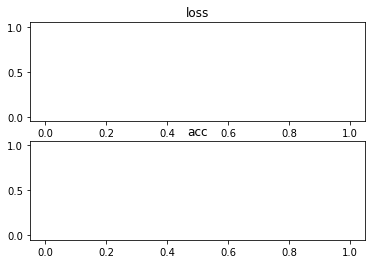

In [8]:
plt.figure()
plt.subplot(2,1,1)
plt.title('loss')
plt.plot(mlp.hist['loss'])

plt.subplot(2,1,2)
plt.title('acc')
plt.plot(mlp.hist['acc'])
plt.show()